In [23]:
#明确数据分析目标：
#对表中的所有变量进行挑选，选择所需要的变量进行分析。这个分析包括：单变量分析、双变量分析和多变量分析。
#此次作业选取“月收入”、“家庭规模”、“婚姻状况”、“生活满意度区间”等变量进行描述分析
#三个分析内容：1.人们的月收入情况、2.月收入对生活满意度区间的影响、3.家庭规模、婚姻状况、对月收入在三千元以下人群的影响
#在分析时使用饼图、交互分类表，tau_y、相关系数强弱判断等手段得出我们提出的现象的判断结论

In [24]:
import mytools
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
import pyreadstat 

In [25]:
#在分析开始前，首先读取数据并对数据进行适当清理，包括对重复值、空白值、现有列的重命名.......等操作
数据表 = mytools.读取SPSS数据文件(R'data\demo.sav')

In [26]:
数据表.rename(columns={
    '@10、1您家里有':'家庭规模',
    '@10、2口人，是':'代际',
    '@3、您的婚姻状况：':'婚姻状况',
    '@9、您的月收入大约是多少？':'月收入',
    }, inplace=True)


In [27]:
### 重复值处理
数据表.drop_duplicates(subset=['序号'],keep='first',inplace=True)

In [28]:
### 空白值处理
# 查看变量是否存在空白值
数据表[数据表.isnull().T.any()].head(2)
# 数据表['婚姻状况'].isnull()


,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,家庭规模,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,NaN,未上过学,群众,佛教,牧民,NaN,NaN,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,NaN,NaN,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [29]:
# 对指定变量填充空白值
数据表['婚姻状况'].fillna('已婚', inplace=True)
数据表['月收入'].fillna('三千元以下', inplace=True)
数据表['家庭规模'].fillna(6, inplace=True)

In [30]:
# 对特定值进行替换
数据表['代际'].replace({'(空)':None}, inplace=True)
数据表['代际'].fillna(3, inplace=True)

In [31]:
# 设定变量类型
数据表.astype({'代际':'int'}).head(2)

,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,家庭规模,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,三千元以下,6.0,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [32]:
数据表.columns

Index(['序号', '@1、您的性别：', '@2、您的年龄：', '婚姻状况', '@4、您的受教育程度是：', '@5、您的政治面貌：',
       '@7、您的信仰是：', '@8、您的职业是：', '月收入', '家庭规模', '代际', '@10、3代人，家里有',
       '@10、4位老人，家里有', '@10、5个小孩，外出打工的人有___人。', '@11、您平常是否通过电脑上网？',
       '@12、您平常是否通过手机上网？', '@13、您平时一周有几天通过电脑上网？', '@14、您平时一周有几天通过手机上网？',
       '@15、1您每天通过手机上网的时间大概为', '@15、2分钟，您每天通过电脑上网的时间为', '@15、3分钟，您每个月的手机话费为',
       '@15、4元，您家的宽带费为___元。', '@16、互联网使用行为（问卷17题至26题）—17、您',
       '@16、18、您认为您在上网时使用搜索引擎（百度', '@16、19、您经常会通过互联网（辣椒直播、下厨',
       '@16、20、您认为您玩手机网络游戏（斗地主、斗', '@16、21、您经常会通过互联网观看小说么？',
       '@16、22、您经常会通过互联网观看视频（快手、', '@16、23、您认为您通过即时通讯（微信、QQ）与他',
       '@16、24、您经常会通过社交网络（微博、陌陌、', '@16、25、您认为您在互联网（淘宝、拼多多、京',
       '@16、26、您经常使用移动支付（支付宝、微信支', 'Q17_1_我目前的生活接近我理想的状态',
       'Q17_2_我的生活条件在各方面都很不错。', 'Q17_3_对我目前的生活，我很满意。',
       'Q17_4_到目前为止，我已经得到了我想要的东西', 'Q17_5_如果我能再活一次我没有什么要改变',
       '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦', '@18、8.自豪', '@18、9.愤怒',
       '@18、10.忧虑', '@18、11.悲哀', '@19、第三部分—1.我能够获得足够有用的媒介信',
       '@19、2.我能够不断更

In [33]:
#第一项：单变量描述统计——月收入
数据表['月收入'].value_counts(normalize=True)

三千到六千元    0.478723
三千元以下     0.446809
无收入       0.074468
六千到九千元    0.000000
九千元以上     0.000000
Name: 月收入, dtype: float64

In [34]:
#单变量描述统计
数据表['月收入'].value_counts()

三千到六千元    45
三千元以下     42
无收入        7
六千到九千元     0
九千元以上      0
Name: 月收入, dtype: int64

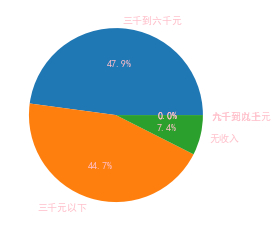

In [35]:
#对有序单变量进行描述，这里我们采用绘制月收入饼图的方式
x = 数据表['月收入'].value_counts().index
y = 数据表['月收入'].value_counts(normalize=True)
fig, ax2 = plt.subplots()
labels = 数据表['月收入'].value_counts().index
ax2.pie(y,autopct='%1.1f%%',labels= labels,textprops=dict(color='pink'))
plt.show()

In [36]:
#进行单变量描述统计——生活满意度区间
数据表['生活满意度区间'].value_counts(normalize=True)

满意       0.542553
基本满意     0.202128
基本不满意    0.095745
非常满意     0.085106
中等       0.042553
不满意      0.031915
极不满意     0.000000
Name: 生活满意度区间, dtype: float64

In [37]:
#第二项，双变量描述统计
#对“月收入”和“生活满意度区间”进行双变量描述统计并制作交互表，进而分析出自变量“月收入”对应变量“生活满意度区间”的影响以及影响的强弱
mytools.制作交叉表(数据表,'月收入','生活满意度区间')

生活满意度区间,非常满意,满意,基本满意,中等,基本不满意,不满意,All
月收入,,,,,,,
无收入,0.000,0.058824,0.052632,0.25,0.222222,0.0,0.074468
三千元以下,0.625,0.294118,0.526316,0.50,0.777778,1.0,0.446809
三千到六千元,0.375,0.647059,0.421053,0.25,0.000000,0.0,0.478723


In [38]:
mytools.两个有序类别变量的统计分析(数据表,'月收入','生活满意度区间')

Somers dy系数:-0.3097 极弱相关或无相关
------------  -  --  --  -  -  -
无收入        0   3   1  1  2  0
三千元以下    5  15  10  2  7  3
三千到六千元  3  33   8  1  0  0
------------  -  --  --  -  -  -
p值： 0.0007
拒绝虚无假设


In [39]:
#月收入与生活满意度区间的相关系数计算
tau_y = mytools.goodmanKruska_tau_y(数据表,'月收入','生活满意度区间')
tau_y

0.07379060085932465

In [40]:
mytools.相关系数强弱判断(tau_y)

'月收入和生活满意度区间之间的关系呈现极弱相关或无相关的特点，说明月收入的多少和生活满意度区间的关系不存在明显的关联性'

In [41]:
#第三项：多变量描述统计
#多变量统计分析，选取多个变量，、B、C影响变量D
#选取 “家庭规模”、“婚姻状况”两个变量研究其对月收收入在三千元以下人员的影响
cross_tab = pd.crosstab(index=[数据表['月收入'], 数据表['家庭规模']], 
                        columns=数据表['婚姻状况'], margins=True, normalize=True)  

cross_tab


婚姻状况               未婚        已婚       All
月收入    家庭规模                              
无收入    5.0   0.010638  0.000000  0.010638
       7.0   0.021277  0.000000  0.021277
       8.0   0.021277  0.000000  0.021277
       9.0   0.000000  0.010638  0.010638
       10.0  0.010638  0.000000  0.010638
三千元以下  3.0   0.000000  0.031915  0.031915
       4.0   0.000000  0.021277  0.021277
       5.0   0.000000  0.042553  0.042553
       6.0   0.000000  0.138298  0.138298
       7.0   0.000000  0.085106  0.085106
       8.0   0.010638  0.042553  0.053191
       9.0   0.010638  0.010638  0.021277
       10.0  0.000000  0.042553  0.042553
       12.0  0.000000  0.010638  0.010638
三千到六千元 2.0   0.000000  0.021277  0.021277
       3.0   0.000000  0.031915  0.031915
       4.0   0.000000  0.021277  0.021277
       5.0   0.000000  0.074468  0.074468
       6.0   0.000000  0.095745  0.095745
       7.0   0.000000  0.074468  0.074468
       8.0   0.000000  0.106383  0.106383
       9.0   0.000000  0.010638  0.010638
       10.0  0.000000  0.042553  0.042553
All          0.085106  0.914894  1.000000

In [42]:
from scipy import stats  
import numpy as np  
import pandas as pd  
  
# 假设我们关注的是收入在三千元以下的人  
specific_grade = '三千元以下'  
  
# 筛选出特定的区间数据  
df_specific_grade = 数据表[数据表['月收入'] == specific_grade]  
  
# 创建家庭规模、月收入、婚姻状况的的交互表  
cross_tab_specific_grade = pd.crosstab(df_specific_grade['家庭规模'], df_specific_grade['婚姻状况'])
  
# 进行卡方检验  
chi2_grade, p_grade, dof_grade, expected_grade = stats.chi2_contingency(cross_tab_specific_grade)
chi2_grade, p_grade, dof_grade,

(13.335, 0.1008313641699656, 8)

In [47]:
'''
在第一二个研究中，我们分别对单变量“月收入”、“生活满意度”进行了分析并同时对将两个变量之间的关系进行了研究，说明了两变量之间的相关性积弱或无相关
在第三个研究中得到的结果是(13.335, 0.1008313641699656, 8),
p值是0.1008313641699656,这意味着在给定的显著性水平下，我们没有足够的证据认为观察到的数据与期望的数据有所不同。
所以家庭规模、婚姻状况对月收入三千以下的人这个研究目标是具有可行性的。
'''

'\n在第一二个研究中，我们分别对单变量“月收入”、“生活满意度”进行了分析并同时对将两个变量之间的关系进行了研究，说明了两变量之间的相关性积弱或无相关\n在第三个研究中得到的结果是(13.335, 0.1008313641699656, 8),\np值是0.1008313641699656,这意味着在给定的显著性水平下，我们没有足够的证据认为观察到的数据与期望的数据有所不同。\n所以家庭规模、婚姻状况对月收入三千以下的人这个研究目标是具有可行性的。\n'